In [9]:
import numpy as np
import cv2
import math
from PIL import Image
import os
from tqdm import tqdm

In [11]:
# total_lines = os.listdir('d://Images')[1:-1]
# test_lines = total_lines[1998+348:]

In [12]:
# dataset_path = 'd://Images'


In [61]:
image_id = test_lines[2]
image_path  = os.path.join(dataset_path, image_id+".jpg")
image = cv2.imread(image_path,0)
# blur = cv2.GaussianBlur(image,(5,5),0)
# ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# th2 = 255-th2
# save_path = os.path.join(save_dir,image_id+'.png')
# cv2.imwrite(save_path, th2)

In [29]:
# gt_imgs = [os.path.join(gt_dir, x + "_segmentation.png") for x in test_lines]  
# for ind in range(len(gt_imgs)):
#     png = Image.open(gt_imgs[ind])
#     png.save(os.path.join('e://毕业论文/test_ground_truth', test_lines[ind]+'.png'))

In [14]:
save_dir = 'd://ostu-result'
dataset_path = 'd://360Downloads/ISIC2018_Task1-2_Test_Input'
test_lines = os.listdir(dataset_path)[1:-1]
test_lines = [image_id.split()[0][:-4] for image_id in test_lines]

In [11]:
gt_dir = 'e://毕业论文/ISIC2018_Task1_Test_GroundTruth'
pred_dir = 'd://swin-uper-swin-total-line3/test-results50/'

In [ ]:
acc_list = []
for image_id in tqdm(test_lines):
    ground_true_label = np.array(Image.open(os.path.join(gt_dir, image_id+'_segmentation.png')))
    pred_label = np.array(Image.open(os.path.join(pred_dir,image_id+'.png')))
    acc_list.append(np.sum(ground_true_label==pred_label)/ground_true_label.shape[0]/ground_true_label.shape[1])

 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [00:42<00:26, 12.43it/s]

In [ ]:
np.mean(np.array(acc_list))

In [98]:
bad = 0   #低于80
middle = 0   #80-90
good = 0   #90
            #图片116和916
            #图片22为0.9左右
for acc in acc_list:
    if acc>=0.8 and acc<0.9:
        middle+=1
    if acc>=0.9:
        good += 1
    if acc < 0.8:
        bad += 1

In [99]:
good,middle,bad

(779, 142, 79)

In [78]:

for i in range(len(acc_list)):
    if acc_list[i]>0.7 and acc_list[i]<0.71:
        print(i, acc_list[i])

920 0.707114608199508


In [91]:
acc_list[920]

0.7476193463360822

In [19]:
acc_list

[0.8682290558510638,
 0.995911227963064,
 0.9978538896276595,
 0.9968572140957447,
 0.9957486702127659,
 0.9940792930100201,
 0.9946981382978723,
 0.978648852166485,
 0.9974645076932751,
 0.7398693309261277,
 0.9972540628144391,
 0.9963709513346354,
 0.9905204772949219,
 0.9935480753580729,
 0.915826161702474,
 0.9702949523925781,
 0.9934476216634115,
 0.9041264851888021,
 0.9708658854166666,
 0.9587821960449219,
 0.866607666015625,
 0.9041404724121094,
 0.9014879862467448,
 0.910498301188151,
 0.8145751953125,
 0.9350802103678385,
 0.9677111307779948,
 0.9551366170247396,
 0.8897361755371094,
 0.9719950358072916,
 0.754730224609375,
 0.92926025390625,
 0.9973680186170213,
 0.9146943151595746,
 0.9986050531914894,
 0.9469238696808512,
 0.9952425199468085,
 0.9883817596136653,
 0.9666418718971752,
 0.9414782352422931,
 0.9759630087122423,
 0.9910076073286173,
 0.9891276222216981,
 0.9848403221877421,
 0.9783518153038908,
 0.972813186135073,
 0.9305651179572967,
 0.9895844670491781,
 0.9

In [80]:
ground_true_label = Image.open(os.path.join(gt_dir, test_lines[920]+'_segmentation.png'))
pred_label = Image.open(os.path.join(pred_dir,test_lines[920]+'.png'))

In [12]:
acc = np.sum(ground_true_label==pred_label)/ground_true_label.shape[0]/ground_true_label.shape[1]

In [13]:
acc

0.8682290558510638

In [4]:
for image_id in tqdm(test_lines):
    image_path  = os.path.join(dataset_path, image_id+".jpg")
    image = cv2.imread(image_path,0)
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    th2 = 255-th2
    save_path = os.path.join(save_dir,image_id+'.png')
    cv2.imwrite(save_path, th2)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:39<00:00, 10.09it/s]


In [17]:
def fast_hist(a, b, n):
    #--------------------------------------------------------------------------------#
    #   a是转化成一维数组的标签，形状(H×W,)；b是转化成一维数组的预测结果，形状(H×W,)
    #--------------------------------------------------------------------------------#
    k = (a >= 0) & (a < n)
    #--------------------------------------------------------------------------------#
    #   np.bincount计算了从0到n**2-1这n**2个数中每个数出现的次数，返回值形状(n, n)
    #   返回中，写对角线上的为分类正确的像素点
    #--------------------------------------------------------------------------------#
    return np.bincount(n * a[k].astype(int) + b[k], minlength=n ** 2).reshape(n, n)  

def per_class_iu(hist):
    return np.diag(hist) / np.maximum((hist.sum(1) + hist.sum(0) - np.diag(hist)), 1) 

def per_class_PA_Recall(hist):
    return np.diag(hist) / np.maximum(hist.sum(1), 1) 

def per_class_Precision(hist):
    return np.diag(hist) / np.maximum(hist.sum(0), 1) 

def per_Accuracy(hist):
    return np.sum(np.diag(hist)) / np.maximum(np.sum(hist), 1) 

def compute_mIoU(gt_dir, pred_dir, png_name_list, num_classes, name_classes=None):  
    print('Num classes', num_classes)  
    #-----------------------------------------#
    #   创建一个全是0的矩阵，是一个混淆矩阵
    #-----------------------------------------#
    hist = np.zeros((num_classes, num_classes))  #2*2
    
    #------------------------------------------------#
    #   获得验证集标签路径列表，方便直接读取
    #   获得验证集图像分割结果路径列表，方便直接读取
    #------------------------------------------------#
    gt_imgs     = [os.path.join(gt_dir, x + "_segmentation.png") for x in png_name_list]  
    pred_imgs   = [os.path.join(pred_dir, x + ".png") for x in png_name_list]  

    #------------------------------------------------#
    #   读取每一个（图片-标签）对
    #------------------------------------------------#
    for ind in range(len(gt_imgs)): 
        #------------------------------------------------#
        #   读取一张图像分割结果，转化成numpy数组
        #------------------------------------------------#
        pred_ = np.array(Image.open(pred_imgs[ind]))  #0为   255为背景
        #------------------------------------------------#
        #   读取一张对应的标签，转化成numpy数组
        #------------------------------------------------#
        png = np.array(Image.open(gt_imgs[ind])) #0为背景， 255为目标
        label  = np.zeros_like(png)
        label[png <= 127.5] = 1
        pred = np.zeros_like(pred_)
        pred[pred_ <= 127.5] = 1

        # 如果图像分割结果与标签的大小不一样，这张图片就不计算
        if len(label.flatten()) != len(pred.flatten()):  
            print(
                'Skipping: len(gt) = {:d}, len(pred) = {:d}, {:s}, {:s}'.format(
                    len(label.flatten()), len(pred.flatten()), gt_imgs[ind],
                    pred_imgs[ind]))
            continue

        #------------------------------------------------#
        #   对一张图片计算21×21的hist矩阵，并累加
        #------------------------------------------------#
        hist += fast_hist(label.flatten(), pred.flatten(), num_classes)  
        # 每计算10张就输出一下目前已计算的图片中所有类别平均的mIoU值
        if name_classes is not None and ind > 0 and ind % 10 == 0: 
            print('{:d} / {:d}: mIou-{:0.2f}%; mPA-{:0.2f}%; Accuracy-{:0.2f}%'.format(
                    ind, 
                    len(gt_imgs),
                    100 * np.nanmean(per_class_iu(hist)),
                    100 * np.nanmean(per_class_PA_Recall(hist)),
                    100 * per_Accuracy(hist)
                )
            )
    #------------------------------------------------#
    #   计算所有验证集图片的逐类别mIoU值
    #------------------------------------------------#
    IoUs        = per_class_iu(hist)
    PA_Recall   = per_class_PA_Recall(hist)
    Precision   = per_class_Precision(hist)
    #------------------------------------------------#
    #   逐类别输出一下mIoU值
    #------------------------------------------------#
    if name_classes is not None:
        for ind_class in range(num_classes):
            print('===>' + name_classes[ind_class] + ':\tIou-' + str(round(IoUs[ind_class] * 100, 2)) \
                + '; Recall (equal to the PA)-' + str(round(PA_Recall[ind_class] * 100, 2))+ '; Precision-' + str(round(Precision[ind_class] * 100, 2)))

    #-----------------------------------------------------------------#
    #   在所有验证集图像上求所有类别平均的mIoU值，计算时忽略NaN值
    #-----------------------------------------------------------------#
    print('===> mIoU: ' + str(round(np.nanmean(IoUs) * 100, 2)) + '; mPA: ' + str(round(np.nanmean(PA_Recall) * 100, 2)) + '; Accuracy: ' + str(round(per_Accuracy(hist) * 100, 2)))  
    hist = np.array(hist)
    return hist, IoUs, PA_Recall, Precision

In [6]:
gt_dir = 'e://毕业论文/ISIC2018_Task1_Test_GroundTruth'

hist, IoUs, _, _ = compute_mIoU(gt_dir, save_dir, test_lines, 2, None)

Num classes 2
===> mIoU: 61.82; mPA: 74.9; Accuracy: 80.09


<ipython-input-5-184bacec6760>:96: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(hist, np.int), IoUs, PA_Recall, Precision


In [22]:
gt_dir = 'e://毕业论文/ISIC2018_Task1_Test_GroundTruth'
save_dir = 'd://swin-uper-swin-total-line3/test-results50'
hist, IoUs, _, _ = compute_mIoU(gt_dir, save_dir, test_lines, 2, None)

Num classes 2
===> mIoU: 84.6; mPA: 91.61; Accuracy: 92.94


In [23]:
hist

array([[1.73049995e+09, 2.28298970e+08],
       [2.38646245e+08, 4.41799242e+09]])

In [24]:
per_class_iu(hist)

array([0.78750541, 0.90441122])

In [25]:
np.nanmean(per_class_iu(hist))

0.8459583149711128

In [19]:
gt_dir = 'e://毕业论文/ISIC2018_Task1_Test_GroundTruth'
_, IoUs, _, _ = compute_mIoU(gt_dir, save_dir, test_lines, 2, None)

Num classes 2
===> mIoU: 67.42; mPA: 78.08; Accuracy: 84.46


<ipython-input-18-184bacec6760>:96: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(hist, np.int), IoUs, PA_Recall, Precision


In [44]:
image = cv2.imread('e:/ISIC_0000000.jpg',0)
image

array([[255, 239, 254, ..., 255, 248, 255],
       [234, 182, 178, ..., 198, 197, 246],
       [251, 179, 161, ..., 183, 186, 251],
       ...,
       [255, 195, 187, ..., 213, 212, 252],
       [242, 193, 193, ..., 219, 214, 248],
       [255, 243, 255, ..., 253, 242, 255]], dtype=uint8)

In [45]:
blur = cv2.GaussianBlur(image,(5,5),0)
# ret1, th1 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [46]:
th2 = 255-th2

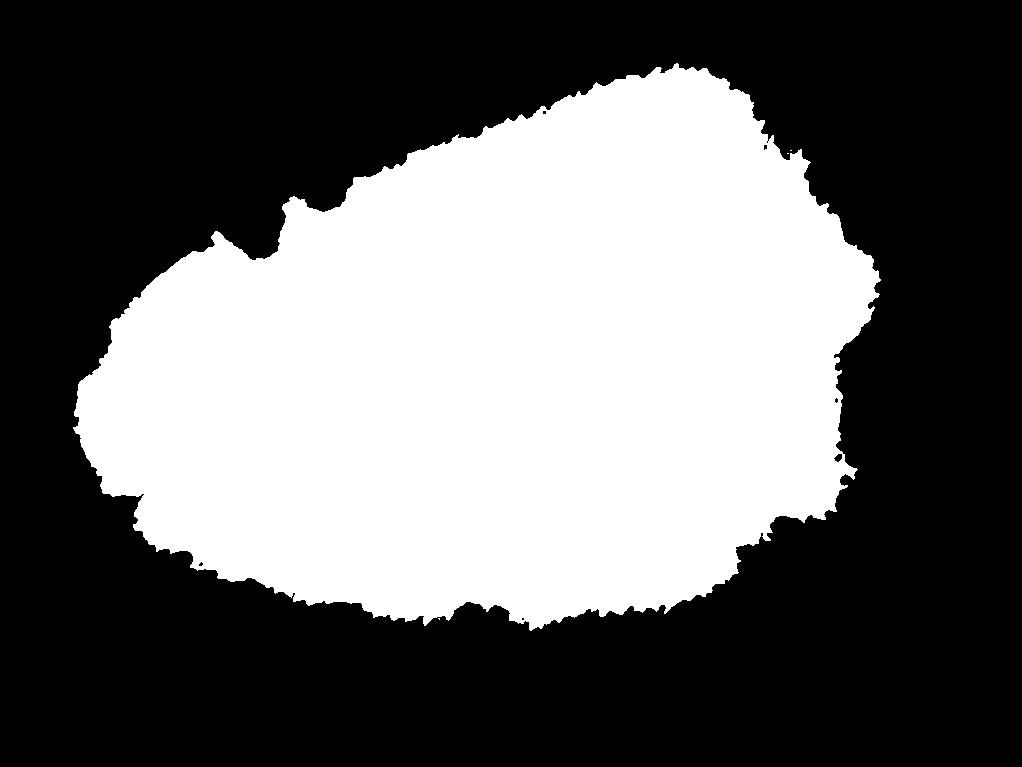

In [47]:
result = Image.fromarray(th2)
result

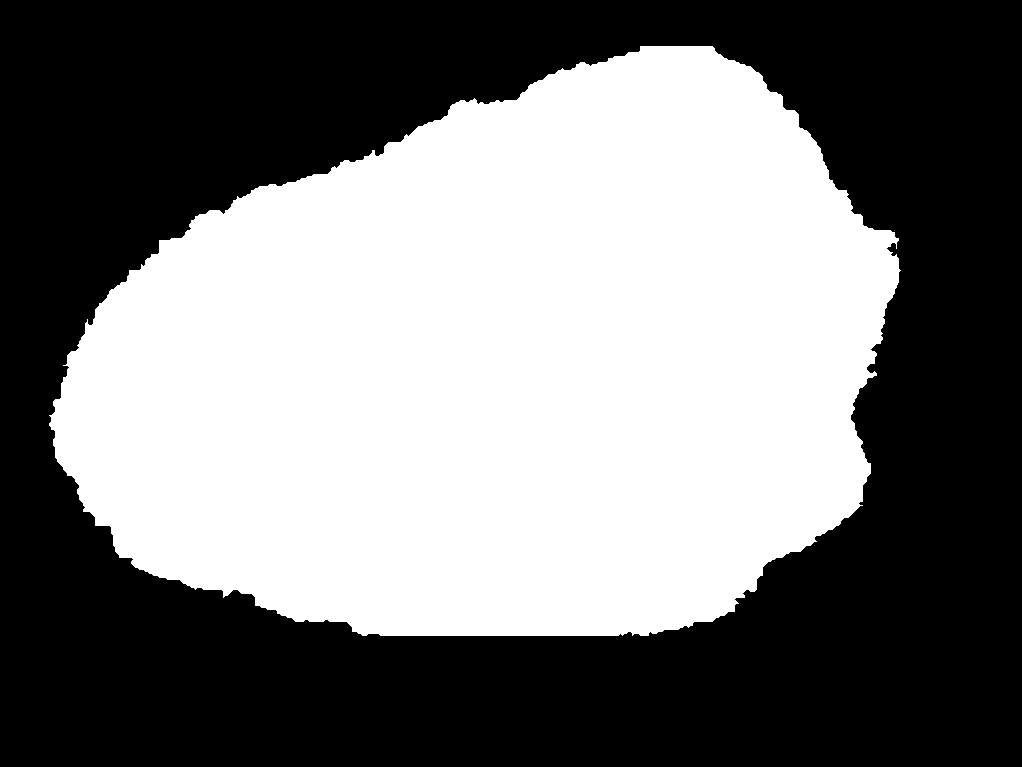

In [34]:
label = Image.open('e://ISIC_0000000_segmentation.png')
label